<a href="https://colab.research.google.com/github/hargurjeet/Credit_Card_Fraud_Detection/blob/main/Credit_card_fraud_detection_Starter_code%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
!pip install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.0 MB/s eta 0:00:00


In [31]:
import numpy as np
import pandas as pd
from git import Repo
import zipfile
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score

In [3]:
# Clone the github repository
git_url = 'https://github.com/hargurjeet/Credit_Card_Fraud_Detection.git'
Repo.clone_from(git_url, '/content/Credit_Card_Fraud_Dataset')

<git.repo.base.Repo '/content/Credit_Card_Fraud_Dataset/.git'>

In [4]:
# Unzip the csv file
with zipfile.ZipFile('/content/Credit_Card_Fraud_Dataset/creditcard.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Credit_Card_Fraud_Dataset/')

## Exploratory data analysis

In [5]:
df = pd.read_csv('/content/Credit_Card_Fraud_Dataset/creditcard.csv')
pd.set_option('display.max_columns', None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(classes)
print()
print('Normal Share in precentage', normal_share)
print()
print('Fraud Share in precentage', fraud_share)

0    284315
1       492
Name: Class, dtype: int64

Normal Share in precentage 99.82725143693798

Fraud Share in precentage 0.1727485630620034


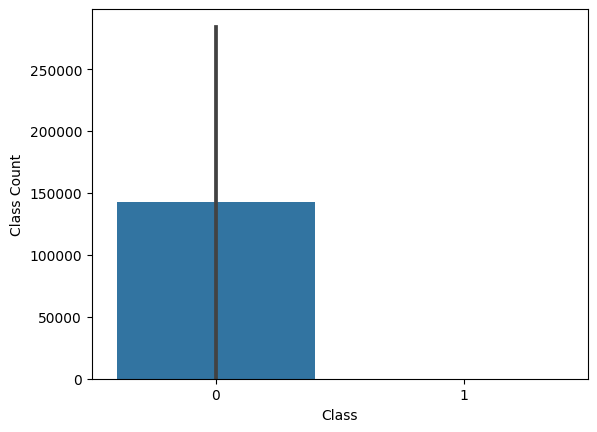

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
ax = sns.barplot(x=df["Class"], y = df['Class'].value_counts())

# Add labels to the x and y axes
ax.set_xlabel("Class")
ax.set_ylabel("Class Count")

# Show the plot
plt.show()

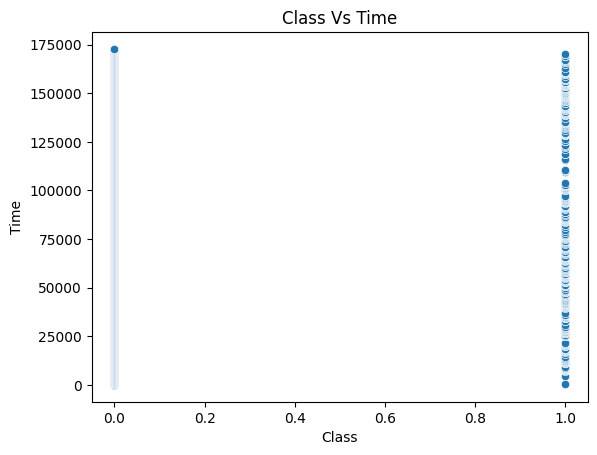

In [9]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df["Class"], y= df['Time'])
plt.title("Class Vs Time")
plt.show()

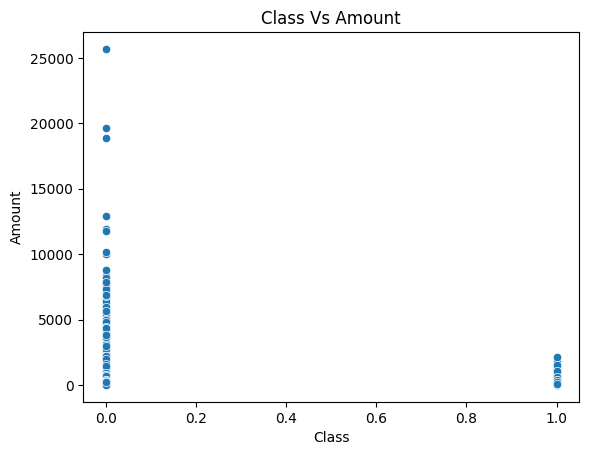

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df["Class"], y= df['Amount'])
plt.title('Class Vs Amount')
plt.show()

In [11]:
# Drop unnecessary columns
X = df.drop('Class', axis=1)

### Splitting the data into train & test data

In [12]:
y= df['Class']

In [13]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
356
136


### Plotting the distribution of a variable

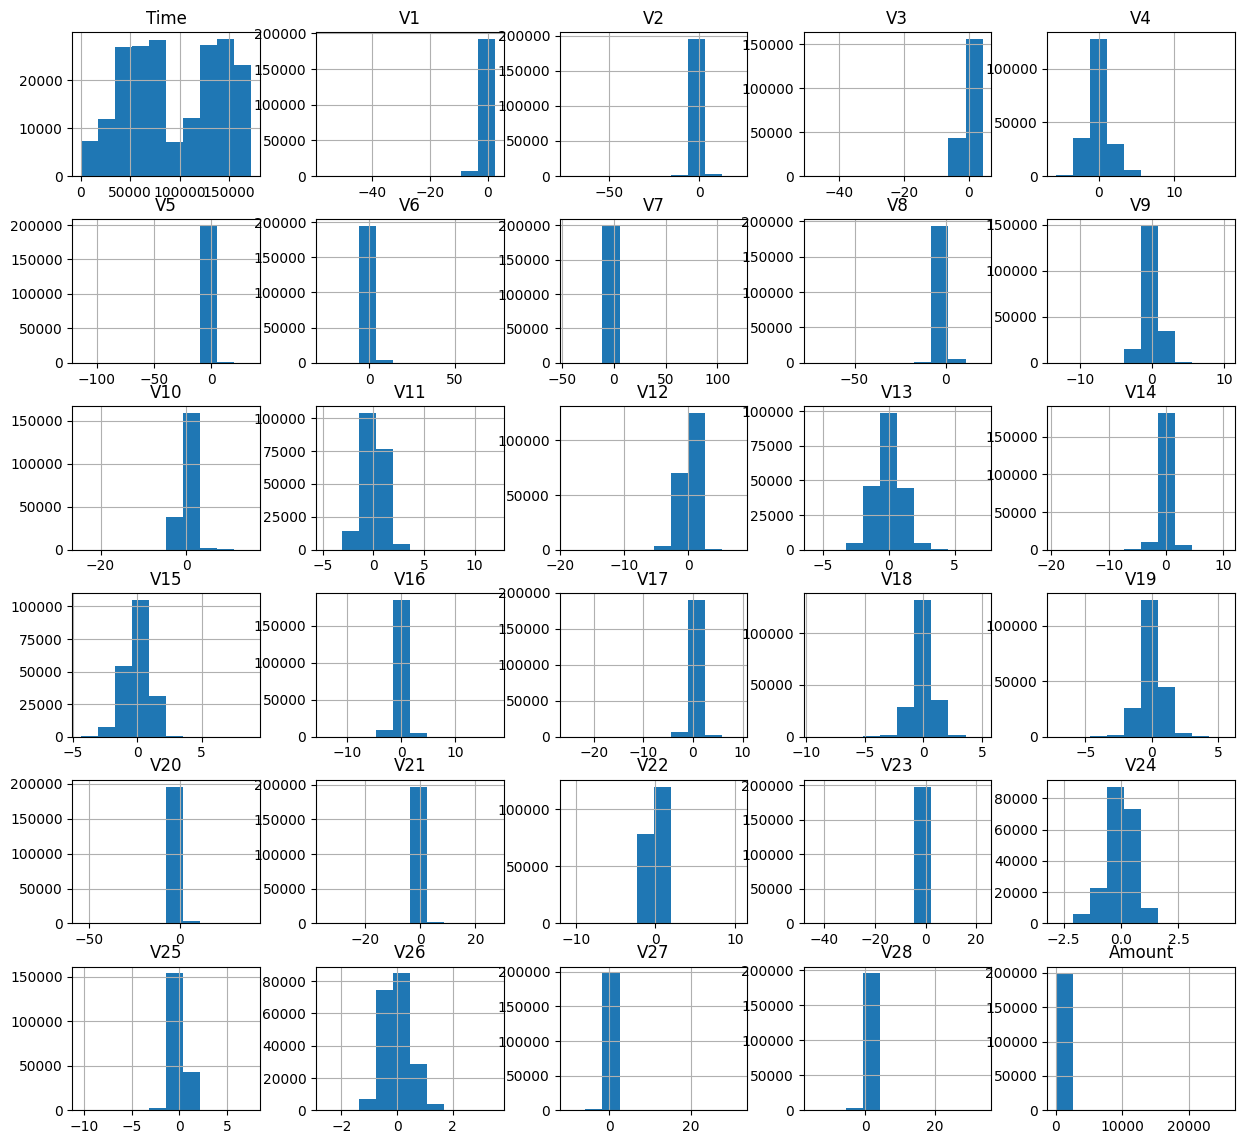

In [15]:
# plot the histogram of a variable from the dataset to see the skewness
X_train.hist(figsize=(15, 14))
plt.show();

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()
X_transformed = pt.fit_transform(X_train)

In [17]:
X_train = pd.DataFrame(X_transformed, columns=X_train.columns)

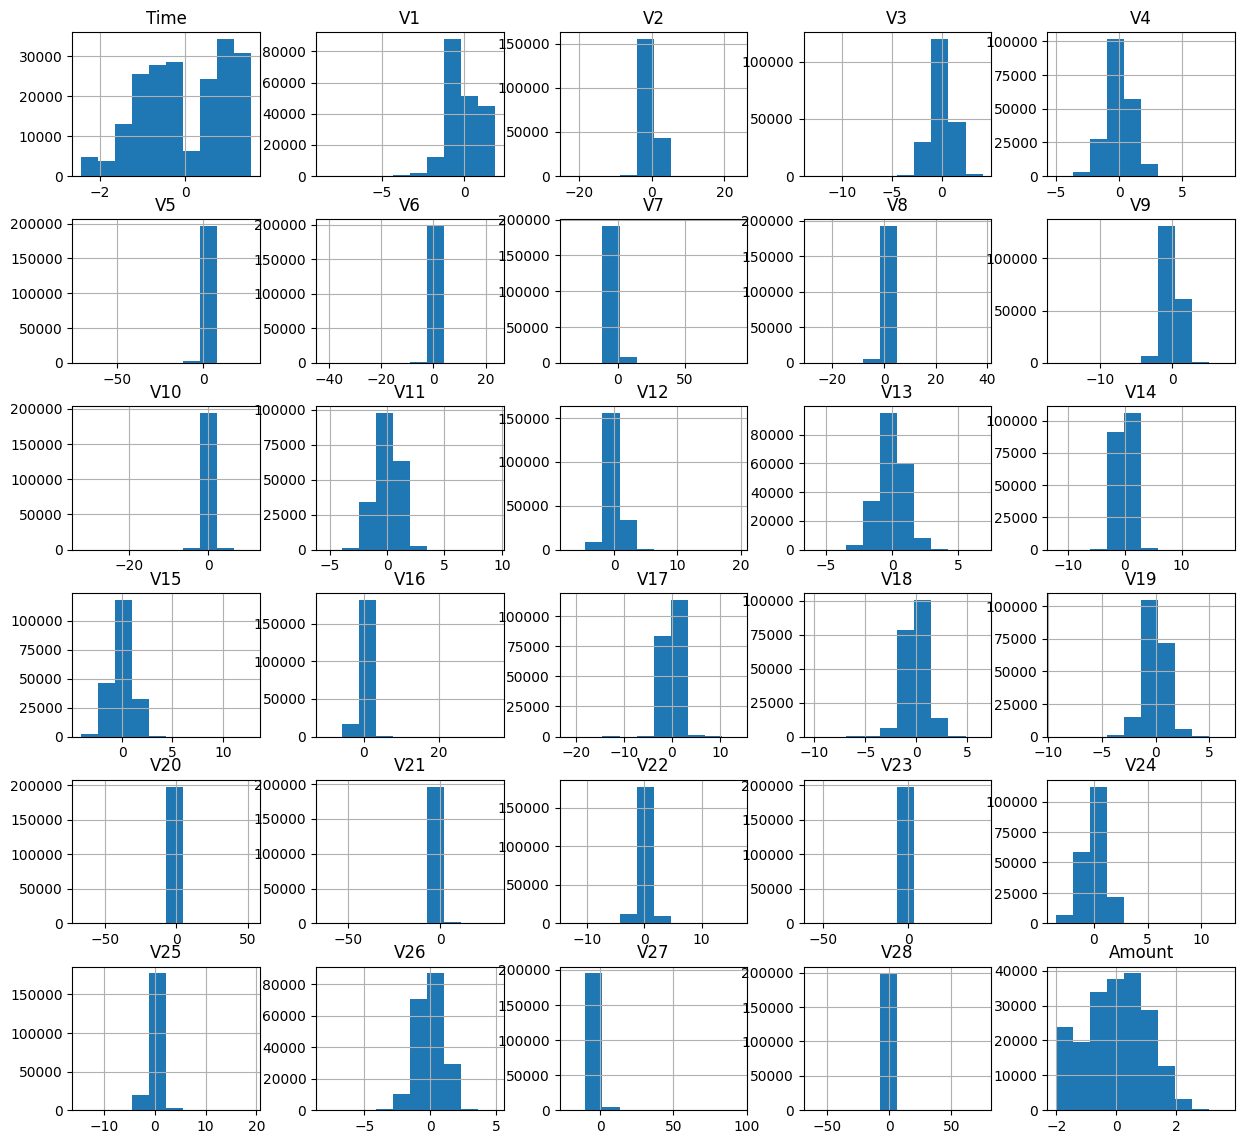

In [18]:
# plot the histogram of a variable from the dataset again to see the result
X_train.hist(figsize=(15, 14))
plt.show();

## Model Building
- Build different models on the imbalanced dataset and see the result

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

num_C = [0.1, 1, 10, 100]
cv_num =   [3, 5]

# Create a logistic regression model
logreg = LogisticRegression()

# Create a KFold cross-validator with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

score = cross_val_score(LogisticRegression(class_weight='balanced', random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 159491, Test set:39873
Fold:2, Train set: 159491, Test set:39873
Fold:3, Train set: 159491, Test set:39873
Fold:4, Train set: 159491, Test set:39873
Fold:5, Train set: 159492, Test set:39872
Scores for each fold are: [0.07811806 0.07973422 0.05943651 0.07197121 0.08083333]
Average score: 0.07


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100]}
cv = [3, 5]

# Create a logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42)

# Create a KFold cross-validator with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=kf, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred = best_estimator.predict(X_test)

# Calculate the F1 score on the test data
f1 = f1_score(y_test, y_pred)
print("F1 Score on Test Data:", f1)

Best Estimator: LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42)
Best F1 Score: 0.09938655453642906
F1 Score on Test Data: 0.0


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5,],
              'weights': ['uniform', 'distance']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)
y_pred_train = best_estimator.predict(X_train)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)

print("F1 Score on Test Data:", f1_test)
print("F1 Score on Train Data:", f1_train)

Best Estimator: KNeighborsClassifier(n_neighbors=3, weights='distance')
Best F1 Score: 0.8418614291481378
F1 Score on Test Data: 0.0
F1 Score on Train Data: 1.0


# SVM

In [23]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1],
              'kernel': ['rbf', 'sigmoid']}

# Create an SVM classifier
svc = svm.SVC()

# Create GridSearchCV
grid_search = GridSearchCV(svc, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)
y_pred_train = best_estimator.predict(X_train)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)

print("F1 Score on Test Data:", f1_test)
print("F1 Score on Train Data:", f1_train)


Best Estimator: SVC(C=1)
Best F1 Score: 0.7657317393573174
F1 Score on Test Data: 0.0
F1 Score on Train Data: 0.894333843797856


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10]}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(rf, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)
y_pred_train = best_estimator.predict(X_train)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)

print("F1 Score on Test Data:", f1_test)
print("F1 Score on Train Data:", f1_train)

# XGB

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10,]}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)
y_pred_train = best_estimator.predict(X_train)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)

print("F1 Score on Test Data:", f1_test)
print("F1 Score on Train Data:", f1_train)

Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best F1 Score: 0.8657047350185536
F1 Score on Test Data: 0.8339483394833948
F1 Score on Train Data: 1.0


#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [23]:
clf = grid_search.best_estimator_  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
f1_test = f1_score(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))
print("F1 Score on Test Data:", f1_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.83      0.83       136

    accuracy                           1.00     85443
   macro avg       0.92      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443

F1 Score on Test Data: 0.8339483394833948


In [26]:
# Plot feature importance
# Plot feature importance
feature_important = grid_search.best_estimator_.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
print(data)

        score
V14     141.0
V4      118.0
Amount  113.0
V26     103.0
V12      98.0
V7       90.0
V11      90.0
V15      87.0
V28      83.0
V16      81.0
Time     80.0
V6       80.0
V22      76.0
V19      76.0
V5       76.0
V1       73.0
V3       72.0
V8       71.0
V24      69.0
V13      68.0
V27      68.0
V17      67.0
V10      67.0
V21      60.0
V20      58.0
V23      54.0
V2       54.0
V18      52.0
V25      44.0
V9       43.0


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 15
2nd Top var = 8
3rd Top var = 11


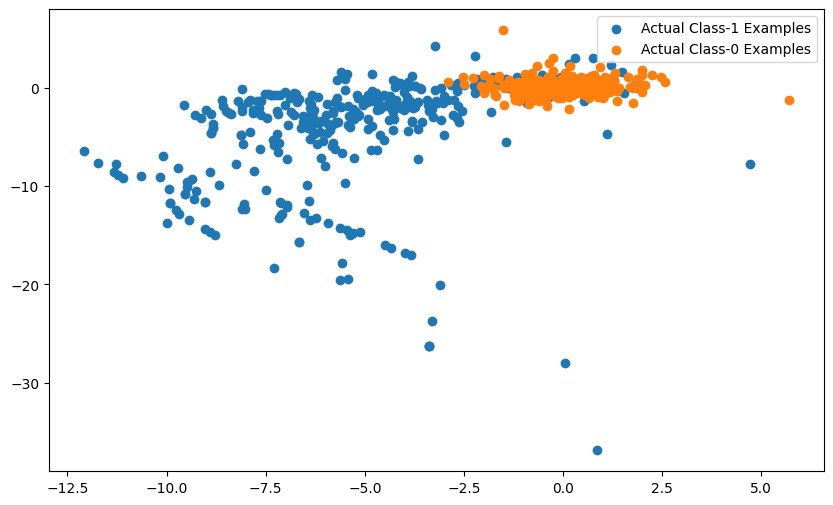

In [27]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [19]:
#Over Sampling
# Define the random over-sampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Summarize the new class distribution
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 199008, 1: 199008})


In [20]:
#smote
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts()

0    199008
1    199008
Name: Class, dtype: int64

In [21]:
oversample = ADASYN()

# Fit and apply the transform
X_ada_over, y_ada_over = oversample.fit_resample(X_train, y_train)

# Summarize the new class distribution
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 199008, 1: 199008})


## Model Building
- Build different models on the balanced dataset and see the result

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

num_C = [0.1, 1, 10, 100]
cv_num =   [3, 5]

# Create a logistic regression model
logreg = LogisticRegression()

# Create a KFold cross-validator with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X_over, y_over):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

score = cross_val_score(LogisticRegression(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 318412, Test set:79604
Fold:2, Train set: 318413, Test set:79603
Fold:3, Train set: 318413, Test set:79603
Fold:4, Train set: 318413, Test set:79603
Fold:5, Train set: 318413, Test set:79603


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Scores for each fold are: [0.56521739 0.7752809  0.6875     0.72081218 0.68493151]
Average score: 0.69


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [23]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your training data

# Perform train-test split for cross-validation
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
print(X_train_cv.shape, y_train_cv.shape)
print(X_test_cv.shape, y_test_cv.shape)

(159491, 30) (159491,)
(39873, 30) (39873,)


In [26]:
y_train_cv.value_counts()

0    159204
1       287
Name: Class, dtype: int64

### Random Oversampling

In [33]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
ros = RandomOverSampler()
X_train_cv_resampled, y_train_cv_resampled = ros.fit_resample(X_train_cv, y_train_cv)

#perform hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}
cv = [3, 5]

# Create a logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Create a KFold cross-validator with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=kf, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train_cv_resampled, y_train_cv_resampled)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_


print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred = best_estimator.predict(X_test)

#print the evaluation result by choosing a evaluation metric
f1 = f1_score(y_test, y_pred)
print("F1 Score on Test Data:", f1)

#print the optimum value of hyperparameters
print("Best Estimator:", best_estimator)

Best F1 Score: 0.950493187672919
F1 Score on Test Data: 0.0
Best Estimator: LogisticRegression(C=0.1, max_iter=1000, random_state=42)


In [35]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# KNN

# SVM

# Descision Tree

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10]}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(rf, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train_cv_resampled, y_train_cv_resampled)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)
y_pred_train = best_estimator.predict(X_train)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)

print("F1 Score on Test Data:", f1_test)
# print("F1 Score on Train Data:", f1_train)

KeyboardInterrupt: ignored

# XGBoost

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10,]}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train_cv_resampled, y_train_cv_resampled)

# Get the best estimator and its corresponding score
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Estimator:", best_estimator)
print("Best F1 Score:", best_score)

# Use the best estimator to predict on the test data
y_pred_test = best_estimator.predict(X_test)
y_pred_train = best_estimator.predict(X_train)

# Calculate the F1 score on the test and train data
f1_test = f1_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)

print("F1 Score on Test Data:", f1_test)
# print("F1 Score on Train Data:", f1_train)

Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Best F1 Score: 0.9999340531656271
F1 Score on Test Data: 0.8464419475655431


In [38]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Print the class distribution after applying SMOTE

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)